In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris
ir=load_iris()
iris= pd.DataFrame(ir.data,columns=ir.feature_names)
iris['target']=ir.target

In [3]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
x=iris.drop('target',axis=1)
y=iris.target

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
g=GridSearchCV(RandomForestClassifier(),{
    'n_estimators':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17],
    'criterion':['gini','entropy','log_loss']
})
g.fit(x,y)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17]})

In [7]:
g.best_params_

{'criterion': 'gini', 'n_estimators': 5}

In [8]:
ran = RandomForestClassifier(criterion='gini',n_estimators=g.best_params_['n_estimators'])

In [9]:
ran.fit(X_train,y_train)
y_pred_ran = ran.predict(X_test)

0.9666666666666667


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



AxesSubplot(0.125,0.125;0.62x0.755)


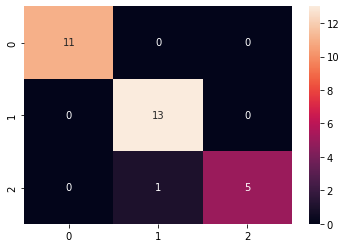

In [10]:
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
print(accuracy_score(y_test,y_pred_ran))
print('\n')
print(classification_report(y_test,y_pred_ran))
print('\n')
print(sns.heatmap(confusion_matrix(y_test,y_pred_ran),annot=True))